In [32]:
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

import pandas as pd

In [42]:
sns.set_theme()

In [4]:
with open("models/01_tfidf_vectorizer_fitted.joblib", "rb") as vFile:
    vectorizer = joblib.load(vFile)
    
with open("models/02_chi2_250_feature_selector_fitted.joblib", "rb") as fsFile:
    feature_selector = joblib.load(fsFile)
    
with open("models/03_random_forest_model_fitted.joblib", "rb") as rfFile:
    random_forest_clf = joblib.load(rfFile)

In [12]:
# Loading kurzgesagt data created in the notebook 02
kurz_comments_df = pd.read_feather("data/kurzgesagt_clean.feather")
kurz_comments_df["comment"] = kurz_comments_df["comment"].transform(list)
kurz_comments_df.head()

,comment
0,"[head, shop, exclusive, kurzgesagt, merch, sci..."
1,"[6, different, type, human, wild, mind, blown]"
2,"[think, primitive, human, woman, wear, bikini,..."
3,"[wish, never, leave, cave, human, animal, duty..."
4,"[together, clip, kardashev, scale, really, cre..."


In [13]:
kurz_comments_df.shape

(135600, 1)

In [23]:
kurz_vect = vectorizer.transform(kurz_comments_df.comment.apply(" ".join))
kurz_chi2 = feature_selector.transform(kurz_vect)
kurz_polarity = random_forest_clf.predict(kurz_chi2)
kurz_polarity_prob = random_forest_clf.predict_proba(kurz_chi2)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.6s finished


In [28]:
map_classes = {
    
    0:"Negative",
    1:"Other",
    2:"Positive"
}

kurz_polarity = pd.Series(kurz_polarity).map(map_classes)

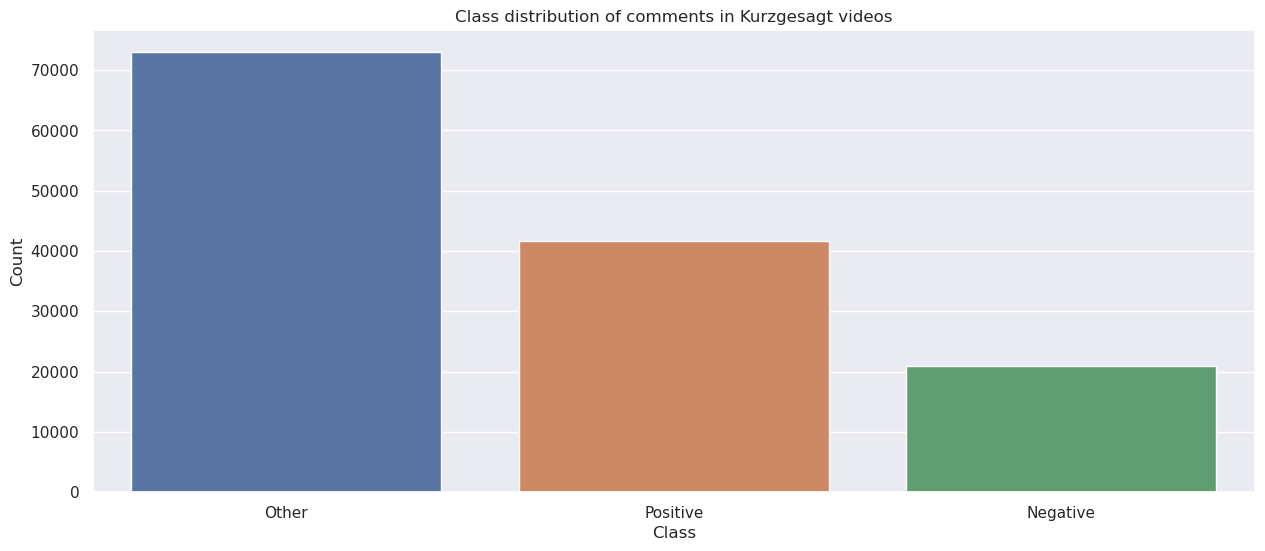

In [44]:
polarity_counts = kurz_polarity.value_counts().to_frame().reset_index()
polarity_counts.columns = ["Class","Count"]

plt.figure(figsize=(15,6))
sns.barplot(data = polarity_counts, x="Class", y="Count")
plt.title("Class distribution of comments in Kurzgesagt videos")
plt.show()